
# **Mounting From Google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Exploring and Adjusting Dataset (**No need to Run**)

Uncomment this section

## Generating true labels

In [ ]:
import json
# Opening JSON file 
f = open('/content/drive/My Drive/Dataset/al5083/al5083/train/train.json',) 

label_train = json.load(f) 

In [ ]:
keys_orig = list(label_train.keys())
values = list(label_train.values())
keys = []
for key in keys_orig:
  a_string = key
  a_string = a_string.replace("/", " ")
  x = a_string.split()
  string = x[0]+' '+x[1]
  keys.append(string)
true_labels_dict = {keys[i]: values[i] for i in range(len(keys))} 
true_labels_dict

## Generating the Dataset Information

In [ ]:
import numpy as np
import pandas as pd
import os 
from os import walk

In [ ]:
location_folders = '/content/drive/My Drive/Dataset/al5083/al5083/train/'
folders = []
for (_, dirnames, _) in walk(location_folders):
    folders.extend(dirnames)
    break

num_files = []
for folder in folders:
  location_files = location_folders + folder +'/'
  files =[]
  for (_, _, filenames) in walk(location_files):
    files.extend(filenames)
    break

  num_files.append(len(files))

num_files = np.array(num_files)
num_files

In [ ]:
label = [true_labels[folder] for folder in folders]
train_data = pd.DataFrame({'folders':folders,
                           'number_of_files':num_files,
                           'Labels':label })
train_data_detail =train_data.sort_values(by=['Labels'])

In [ ]:
filename = 'data_detail.csv' 
train_data_detail.to_csv(filename, index=False)
# import os
# os.chdir(r'/content/')
# from IPython.display import FileLink
# FileLink(r'data_detail.csv')

## Changing the dataset in Gdrive(Run only Once)
Uncomment First

In [ ]:
import os 
from os import walk

location_folders = '/content/drive/My Drive/Dataset/al5083/al5083/train/'
folders = []
for (_, dirnames, _) in walk(location_folders):
    folders.extend(dirnames)
    break
# folders
for folder in folders:
  location_files = location_folders + folder +'/'
  files =[]
  for (_, _, filenames) in walk(location_files):
    files.extend(filenames)
    break
  # print(len(files))

#   """
#   Now we need to reduce the skewness of the data
#   Min is 55 and max goes to 2400
#   """
  if true_labels[folder] == 0:
    for i,file in enumerate(files):
      if (i+1)%8 == 1:
        # print('Skipped successfully')
        None
      else:
        # path = os.path.join(location_files, file) 
        path = location_files + file
        os.remove(path) 
        print("%s has been removed successfully" %file)
  elif true_labels[folder] == 1:
    for i,file in enumerate(files):
      if (i+1)%2 == 1:
        None
      else:
        # path = os.path.join(location_files, file) 
        path = location_files + file
        os.remove(path) 
        print("%s has been removed successfully" %file)
  elif true_labels[folder] == 2:
    for i,file in enumerate(files):
      if (i+1)%7 == 1:
        None
      else:
        # path = os.path.join(location_files, file) 
        path = location_files + file
        os.remove(path) 
        print("%s has been removed successfully" %file)
  elif true_labels[folder] == 3:
    for i,file in enumerate(files):
      if (i+1)%4 == 1:
        None
      else:
        # path = os.path.join(location_files, file) 
        path = location_files + file
        os.remove(path) 
        print("%s has been removed successfully" %file)
  elif true_labels[folder] == 4:
    for i,file in enumerate(files):
      if (i+1)%3 == 1:
        None
      else:
        # path = os.path.join(location_files, file) 
        path = location_files + file
        os.remove(path) 
        print("%s has been removed successfully" %file)
  elif true_labels[folder] == 5:
    for i,file in enumerate(files):
      if (i+1)%3 == 1:
        None
      else:
        # path = os.path.join(location_files, file) 
        path = location_files + file
        os.remove(path) 
        print("%s has been removed successfully" %file)

In [ ]:
  if len(files) <= 150:
    pass
  elif len(files) > 150 and len(files) <= 400:
    for i,file in enumerate(files):
      if (i+1)%5 == 1:
        None
      else:
        # path = os.path.join(location_files, file) 
        path = location_files + file
        os.remove(path) 
        print("%s has been removed successfully" %file)
    elif len(files) > 1000:
  elif len(files) > 400:
    for i,file in enumerate(files):
        if (i+1)%8 == 1:
          None
        else:
          # path = os.path.join(location_files, file) 
          path = location_files + file
          os.remove(path) 
          print("%s has been removed successfully" %file)

    path = os.path.join(location, file) 

# CNN Model 

## Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.nn.parameter import Parameter
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, utils, datasets
import matplotlib.pyplot as plt


torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)

## Dataset Creation

In [ ]:
mean = 0.2069
std = 0.1471

In [ ]:
data_dir = '/content/drive/My Drive/Dataset/al5083/al5083/train'
transform = transforms.Compose([
     transforms.CenterCrop((800,800)),
     transforms.ToTensor(),
     transforms.Normalize(mean, std)
     ])

train_dataset = datasets.ImageFolder(root =data_dir,transform = transform)

In [ ]:
original_labels_dict = train_dataset.class_to_idx

## Matching the loaded data with Labels

In [ ]:
import json
# Opening JSON file 
f = open('/content/drive/My Drive/Dataset/al5083/al5083/train/train.json',) 

label_train = json.load(f) 
keys_orig = list(label_train.keys())
values = list(label_train.values())
keys = []
for key in keys_orig:
  a_string = key
  a_string = a_string.replace("/", " ")
  x = a_string.split()
  string = x[0]+' '+x[1]
  keys.append(string)
true_labels_dict = {keys[i]: values[i] for i in range(len(keys))} 
true_labels_dict

{'170815-133921-Al 2mm': 2,
 '170815-134756-Al 2mm': 2,
 '170904-112347-Al 2mm': 2,
 '170904-113012-Al 2mm-part1': 5,
 '170904-113012-Al 2mm-part2': 4,
 '170904-115503-Al 2mm': 5,
 '170904-115959-Al 2mm': 2,
 '170904-141232-Al 2mm-part1': 5,
 '170904-141232-Al 2mm-part2': 2,
 '170904-141232-Al 2mm-part3': 4,
 '170904-141730-Al 2mm-part1': 0,
 '170904-141730-Al 2mm-part2': 2,
 '170904-141730-Al 2mm-part3': 4,
 '170904-145718-Al 2mm-part1': 0,
 '170904-145718-Al 2mm-part2': 4,
 '170904-150144-Al 2mm-part1': 2,
 '170904-151845-Al 2mm-part1': 5,
 '170904-151845-Al 2mm-part2': 2,
 '170904-152301-Al 2mm-part1': 4,
 '170904-154202-Al 2mm-part2': 4,
 '170904-155523-Al 2mm': 4,
 '170905-110711-Al 2mm-part1': 5,
 '170905-110711-Al 2mm-part2': 4,
 '170905-114307-Al 2mm': 0,
 '170905-115602-Al 2mm': 0,
 '170906-113317-Al 2mm-part3': 1,
 '170906-114912-Al 2mm': 0,
 '170906-120346-Al 2mm': 0,
 '170906-141809-Al 2mm-part1': 0,
 '170906-141809-Al 2mm-part2': 2,
 '170906-144958-Al 2mm': 1,
 '170906-150

## Network Architecture

In [ ]:
class Network(nn.Module):    
    def __init__(self):
        super().__init__()
        
        self.features = nn.Sequential(
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(3, 8, kernel_size=5, stride=2),
            nn.BatchNorm2d(8),
            nn.ReLU(inplace=True),
            nn.Dropout(p = 0.1),

            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(8, 16, kernel_size=5, stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.Dropout(p = 0.2),

            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(16, 16, kernel_size=5),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            nn.Dropout(p = 0.2),

            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(16,8, kernel_size=3),
            nn.BatchNorm2d(8),
            nn.ReLU(inplace=True),
        )
          
        self.classifier = nn.Sequential(
            nn.Dropout(p = 0.2),
            nn.Linear(102400//200, 256),
            # nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            
            nn.Dropout(p = 0.2),
            nn.Linear(256, 128),
            # nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            
            nn.Dropout(p = 0.1),
            nn.Linear(128, 6),
#             nn.BatchNorm1d(512), not in this model
            nn.Softmax(dim=1)
        )
             
                

    def forward(self, x):
        x = self.features(x)
        x = x.reshape(-1, 102400//200)
        x = self.classifier(x)
        
        return x
    
def get_num_correct(pred, label):
    return pred.argmax(dim=1).eq(label).sum().item()

## Creating an Instance of the Network

In [ ]:
net = Network()
# net

In [ ]:
torch.cuda.is_available()

True

In [ ]:
device = torch.device("cuda:0")
print(device)
if torch.cuda.is_available():
    device = torch.device("cuda:0")  # you can continue going on here, like cuda:1 cuda:2....etc. 
    print("Running on the GPU")
else:
    device = torch.device("cpu")
    print("Running on the CPU")

cuda:0
Running on the GPU


In [ ]:
net = Network()
net.to(device)

Network(
  (features): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Conv2d(3, 8, kernel_size=(5, 5), stride=(2, 2))
    (2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): Dropout(p=0.1, inplace=False)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(8, 16, kernel_size=(5, 5), stride=(2, 2))
    (7): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Dropout(p=0.2, inplace=False)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
    (12): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): Dropout(p=0.2, inplace=False)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1,

## Label Mapping

In [ ]:
label_map_dict = {}

for key,value in original_labels_dict.items():
  label_map_dict.update({value:true_labels_dict[key]})
label_map_dict

{0: 2,
 1: 2,
 2: 2,
 3: 5,
 4: 4,
 5: 5,
 6: 2,
 7: 5,
 8: 2,
 9: 4,
 10: 0,
 11: 2,
 12: 4,
 13: 0,
 14: 4,
 15: 2,
 16: 5,
 17: 2,
 18: 4,
 19: 4,
 20: 4,
 21: 5,
 22: 4,
 23: 0,
 24: 0,
 25: 1,
 26: 0,
 27: 0,
 28: 0,
 29: 2,
 30: 1,
 31: 3,
 32: 3,
 33: 3,
 34: 5,
 35: 2,
 36: 4,
 37: 0,
 38: 0,
 39: 2,
 40: 0,
 41: 2,
 42: 0,
 43: 2,
 44: 0,
 45: 4}

## Training the Network

In [ ]:
# for batch in train_loader:
#   image, label_original = batch
#   label = [label_map_dict[lab.item()] for lab in label_original]
#   # for lab in label:
#   #   print(lab.item())
# print(label)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=200, shuffle=True)
optimizer = optim.Adam(net.parameters(), lr=5e-4, weight_decay = 1e-3)

In [ ]:
print(len(train_dataset))
print(len(train_loader))

5841
30


In [ ]:
%%time
# tic()
epoch = 0
acc = 0
while epoch<10 and acc<90:
# for epoch in range(20): #
    total_loss = 0
    total_correct =0
    i=1
    total_length = 0
    for batch in train_loader:
        image, label_original = batch
        label = [label_map_dict[lab.item()] for lab in label_original]
        label = torch.tensor(label)
        # if i<10:
        

        pred = net(image.to(device))
        loss = F.cross_entropy(pred, label.to(device))
#         loss = F.mse_loss(pred, label.to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += get_num_correct(pred,label.to(device))
        total_length += len(label)
        acc = 100*total_correct/total_length
        print('Batch No.', i,'/',len(train_loader), ' Batch Accuracy :',  acc)
        i=i+1
        
    acc = total_correct*100/len(train_dataset)
    #-------------------------------------------------
    print('epoch: ', epoch+1, ', Total_correct: ', total_correct,', Loss: : ', total_loss, ' Accuracy: ', total_correct*100/len(train_dataset))
    epoch+=1
# print(toc())
# torch.set_grad_enabled(False)

Batch No. 1 / 30  Batch Accuracy : 19.0
Batch No. 2 / 30  Batch Accuracy : 25.25
Batch No. 3 / 30  Batch Accuracy : 29.166666666666668
Batch No. 4 / 30  Batch Accuracy : 34.125
Batch No. 5 / 30  Batch Accuracy : 36.4
Batch No. 6 / 30  Batch Accuracy : 39.583333333333336
Batch No. 7 / 30  Batch Accuracy : 41.642857142857146
Batch No. 8 / 30  Batch Accuracy : 43.6875
Batch No. 9 / 30  Batch Accuracy : 45.111111111111114
Batch No. 10 / 30  Batch Accuracy : 47.25
Batch No. 11 / 30  Batch Accuracy : 48.86363636363637
Batch No. 12 / 30  Batch Accuracy : 49.666666666666664
Batch No. 13 / 30  Batch Accuracy : 51.07692307692308
Batch No. 14 / 30  Batch Accuracy : 52.285714285714285
Batch No. 15 / 30  Batch Accuracy : 53.43333333333333
Batch No. 16 / 30  Batch Accuracy : 54.21875
Batch No. 17 / 30  Batch Accuracy : 54.61764705882353
Batch No. 18 / 30  Batch Accuracy : 55.361111111111114
Batch No. 19 / 30  Batch Accuracy : 56.13157894736842
Batch No. 20 / 30  Batch Accuracy : 56.675
Batch No. 21 

KeyboardInterrupt: ignored

In [ ]:
img = image[0]
img.shape

torch.Size([3, 800, 800])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


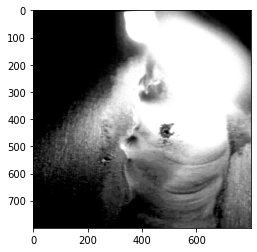

In [ ]:
plt.imshow(  img.permute(1, 2, 0)  )

In [ ]:
# while epoch<25:
# # for epoch in range(20): #
#     total_loss = 0
#     total_correct =0
#     i=1
#     total_length = 0
#     for batch in train_loader:
#         image, label_original = batch
#         label = [label_map_dict[lab.item()] for lab in label_original]
#         label = torch.tensor(label)
#         # if i<10:
        

#         pred = net(image.to(device))
#         loss = F.cross_entropy(pred, label.to(device))
# #         loss = F.mse_loss(pred, label.to(device))

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()
#         total_correct += get_num_correct(pred,label.to(device))
#         total_length += len(label)
#         acc = 100*total_correct/total_length
#         print('Batch No.', i, ' Batch Accuracy :',  acc)
#         i=i+1
        
#     acc = total_correct*100/len(train_dataset)
#     #-------------------------------------------------
#     print('epoch: ', epoch+1, ', Total_correct: ', total_correct,', Loss: : ', total_loss, ' Accuracy: ', total_correct*100/len(train_dataset))
#     epoch+=1

In [ ]:
# torch.set_grad_enabled(True)

## Saving model

In [ ]:
PATH_model = "/content/drive/My Drive/modelv5.pt"
torch.save(net.state_dict(), PATH_model)

In [ ]:
# checkpoint = {'model': net,
#               'state_dict': net.state_dict(),
#               'optimizer' : optimizer.state_dict()}

# torch.save(checkpoint, 'checkpointv5.pt')

# !cp checkpointv5.pt "/content/drive/My Drive"

# **Test the Model**

## New Section

In [ ]:
test_data_dir = '/content/drive/My Drive/Dataset/al5083/al5083/test'

transform_test = transforms.Compose([
     transforms.CenterCrop((800,800)),
     transforms.ToTensor(),
     ])

test_dataset = datasets.ImageFolder(root =test_data_dir,transform = transform_test)
test_dataset

Dataset ImageFolder
    Number of datapoints: 6588
    Root location: /content/drive/My Drive/Dataset/al5083/al5083/test
    StandardTransform
Transform: Compose(
               CenterCrop(size=(800, 800))
               ToTensor()
           )

## Generating true labels

In [ ]:
import json
# Opening JSON file 
f = open('/content/drive/My Drive/Dataset/al5083/al5083/test/test.json',) 

label_test = json.load(f) 

In [ ]:
keys_orig = list(label_test.keys())
values = list(label_test.values())
keys = []
for key in keys_orig:
  a_string = key
  a_string = a_string.replace("/", " ")
  x = a_string.split()
  string = x[0]+' '+x[1]
  keys.append(string)
true_test_labels_dict = {keys[i]: values[i] for i in range(len(keys))} 
true_test_labels_dict

{'170904-150144-Al 2mm-part2': 4,
 '170904-152301-Al 2mm-part2': 5,
 '170904-154202-Al 2mm-part1': 2,
 '170904-155610-Al 2mm': 2,
 '170905-112213-Al 2mm': 0,
 '170906-104925-Al 2mm': 0,
 '170906-113317-Al 2mm-part1': 0,
 '170906-143512-Al 2mm-part1': 2,
 '170906-143512-Al 2mm-part2': 1,
 '170906-151724-Al 2mm-part1': 3,
 '170906-153326-Al 2mm-part3': 3,
 '170906-155007-Al 2mm-part1': 3,
 '170906-155007-Al 2mm-part2': 4,
 '170913-154448-Al 2mm': 0}

## Matching the loaded data with Labels

In [ ]:
original_test_labels_dict = test_dataset.class_to_idx
original_test_labels_dict

{'170904-150144-Al 2mm-part2': 0,
 '170904-152301-Al 2mm-part2': 1,
 '170904-154202-Al 2mm-part1': 2,
 '170904-155610-Al 2mm': 3,
 '170905-112213-Al 2mm': 4,
 '170906-104925-Al 2mm': 5,
 '170906-113317-Al 2mm-part1': 6,
 '170906-143512-Al 2mm-part1': 7,
 '170906-143512-Al 2mm-part2': 8,
 '170906-151724-Al 2mm-part1': 9,
 '170906-153326-Al 2mm-part3': 10,
 '170906-155007-Al 2mm-part1': 11,
 '170906-155007-Al 2mm-part2': 12,
 '170913-154448-Al 2mm': 13}

## Label Mapping

In [ ]:
test_label_map_dict = {}

for key,value in original_test_labels_dict.items():
  test_label_map_dict.update({value:true_test_labels_dict[key]})
test_label_map_dict

{0: 4,
 1: 5,
 2: 2,
 3: 2,
 4: 0,
 5: 0,
 6: 0,
 7: 2,
 8: 1,
 9: 3,
 10: 3,
 11: 3,
 12: 4,
 13: 0}

## New Section

In [ ]:
# checkpoint = {'model': net,
#               'state_dict': net.state_dict(),
#               'optimizer' : optimizer.state_dict()}

# torch.save(checkpoint, 'checkpoint3.pth')

# !cp checkpoint3.pth "/content/drive/My Drive/Trained models"


In [ ]:
# def load_checkpoint(filepath):
#     checkpoint = torch.load(filepath)
#     model = checkpoint['model']
#     model.load_state_dict(checkpoint['state_dict'])
#     for parameter in model.parameters():
#         parameter.requires_grad = True
    
#     model.eval()
    
#     return model
# net = load_checkpoint('/content/drive/My Drive/checkpointv5.pt')
# net.to(device)

In [ ]:
# net = Network()
# net.load_state_dict(torch.load(PATH_model, map_location=device))
# net.to(device)

In [ ]:
torch.cuda.empty_cache()

In [ ]:
torch.set_grad_enabled(False)

In [ ]:
total_correct=0
correct_predictions = []
i=0
total = 0
test_loader = DataLoader(test_dataset, batch_size=200)
for batch in test_loader:
  image, label_original = batch
  label = [test_label_map_dict[lab.item()] for lab in label_original]
  label = torch.tensor(label)
  
  

  pred = net(image.to(device))
  
  total_correct += get_num_correct(pred,label.to(device))
  correct_predictions.append(total_correct)

  total += len(label)
  acc = 100*total_correct/(total)
  print('Batch No: ',i+1,', Test Batch Accuracy : ', acc)
  i=i+1
print(total_correct/len(test_dataset))

Batch No:  1 , Test Batch Accuracy :  30.5
Batch No:  2 , Test Batch Accuracy :  43.0
Batch No:  3 , Test Batch Accuracy :  55.833333333333336
Batch No:  4 , Test Batch Accuracy :  57.875
Batch No:  5 , Test Batch Accuracy :  59.9
Batch No:  6 , Test Batch Accuracy :  52.916666666666664
Batch No:  7 , Test Batch Accuracy :  46.214285714285715
Batch No:  8 , Test Batch Accuracy :  51.0625
Batch No:  9 , Test Batch Accuracy :  56.5
Batch No:  10 , Test Batch Accuracy :  60.8
Batch No:  11 , Test Batch Accuracy :  64.18181818181819
Batch No:  12 , Test Batch Accuracy :  65.70833333333333
Batch No:  13 , Test Batch Accuracy :  63.88461538461539
Batch No:  14 , Test Batch Accuracy :  60.964285714285715
Batch No:  15 , Test Batch Accuracy :  57.13333333333333
Batch No:  16 , Test Batch Accuracy :  53.71875
Batch No:  17 , Test Batch Accuracy :  50.73529411764706
Batch No:  18 , Test Batch Accuracy :  48.30555555555556
Batch No:  19 , Test Batch Accuracy :  46.1578947368421
Batch No:  20 , Te

In [ ]:
# total_correct=0
# correct_predictions = []
# i=0
# total = 0
# test_loader = DataLoader(test_dataset, batch_size=100)
# for batch in test_loader:
#   image, label_original = batch
#   label = [test_label_map_dict[lab.item()] for lab in label_original]
#   label = torch.tensor(label)
  
  

#   pred = net(image.to(device))
  
#   total_correct += get_num_correct(pred,label.to(device))
#   correct_predictions.append(total_correct)

#   total += len(label)
#   acc = 100*total_correct/(total)
#   print('Batch No: ',i+1,', Test Accuracy : ', acc)
#   i=i+1
# print(total_correct/len(test_dataset))